In [1]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d tmdb/tmdb-movie-metadata

Dataset URL: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata
License(s): other
 79% 7.00M/8.89M [00:00<00:00, 13.5MB/s]
100% 8.89M/8.89M [00:00<00:00, 11.5MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/tmdb-movie-metadata.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
movies = pd.read_csv('/content/tmdb_5000_movies.csv')
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [6]:
credits = pd.read_csv('/content/tmdb_5000_credits.csv')
credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [7]:
movies.shape

(4803, 20)

In [8]:
credits.shape

(4803, 4)

In [9]:
movies = movies.merge(credits,on='title')

In [10]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [11]:
movies.shape

(4809, 23)

In [12]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')

In [13]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [17]:
# Top 10 movies based on revenue
top_revenue = movies.sort_values(by='revenue', ascending=False).head(10)

In [16]:
# Top 10 movies based on popularity
top_popularity = movies.sort_values(by='popularity', ascending=False).head(10)

In [15]:
# Top 10 movies based on budget
top_budget = movies.sort_values(by='budget', ascending=False).head(10)

In [14]:
# Top 10 movies based on vote count
top_vote_count = movies.sort_values(by='vote_count', ascending=False).head(10)

<ipython-input-18-57ea51333185>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 0], x='vote_count', y='title', data=top_vote_count, palette='viridis')
<ipython-input-18-57ea51333185>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 1], x='budget', y='title', data=top_budget, palette='inferno')
<ipython-input-18-57ea51333185>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1, 0], x='popularity', y='title', data=top_popularity, palette='magma')
<ipython-input-18-57ea51333185>:24: FutureWarning: 

Passing `pale

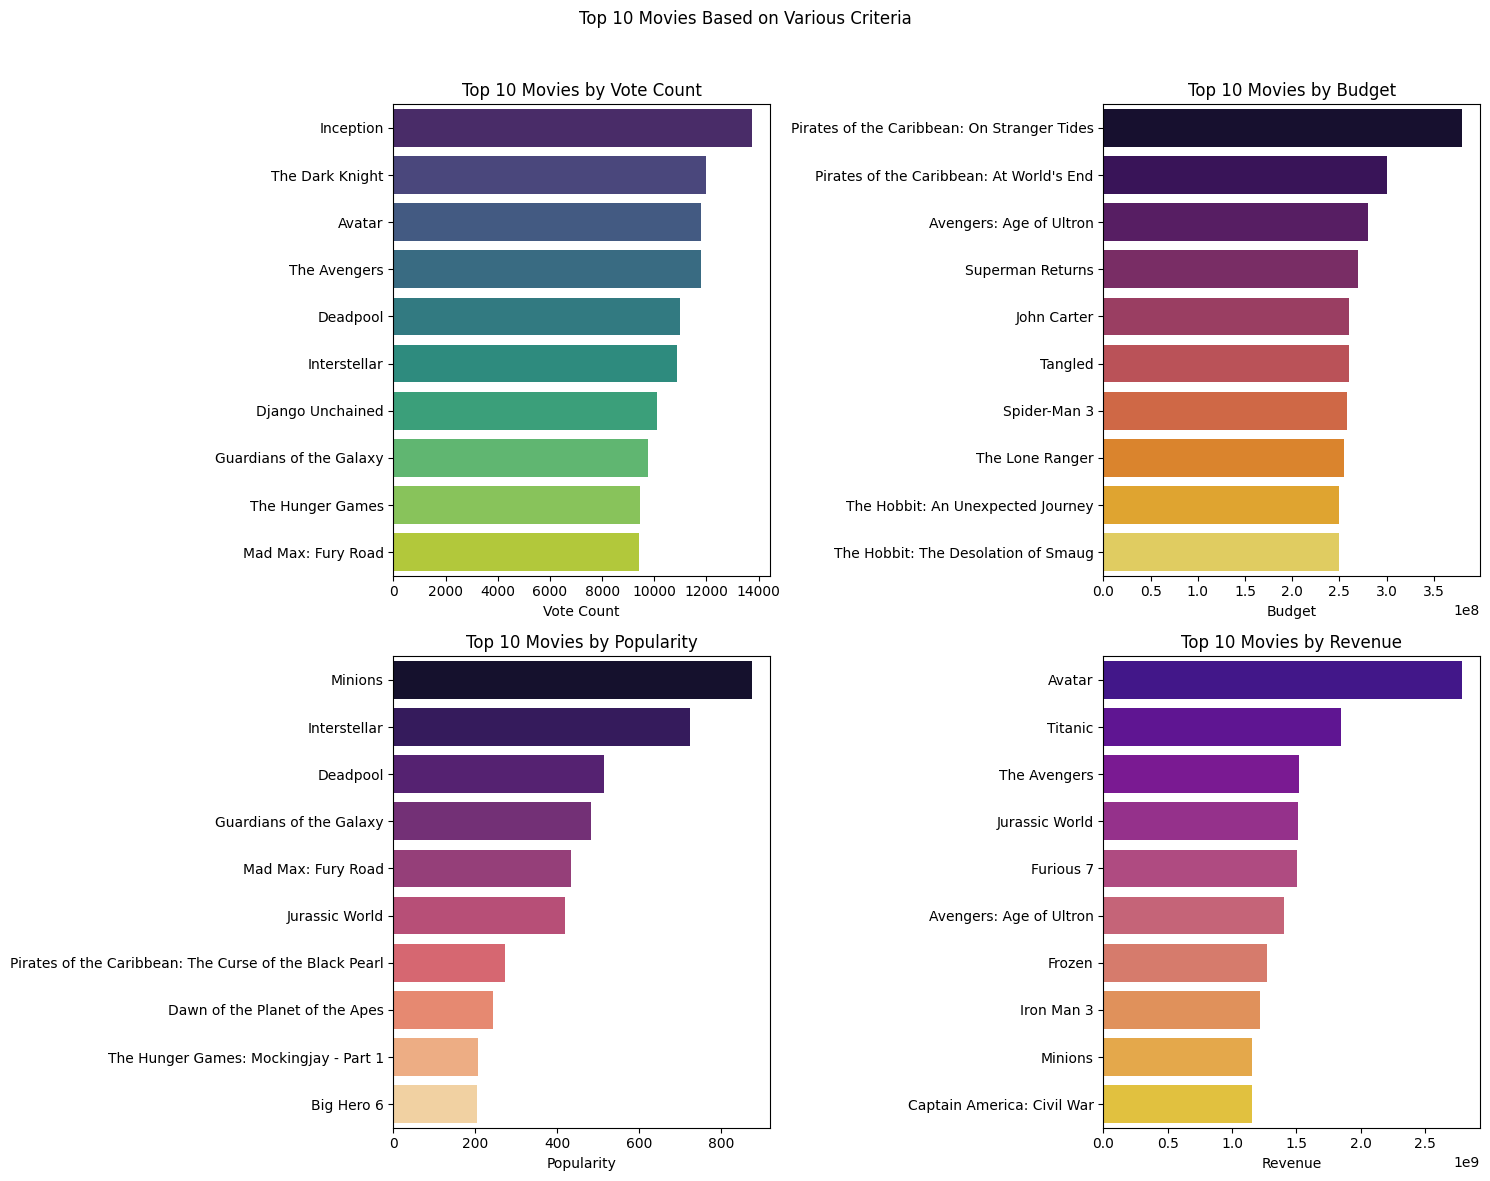

In [18]:
# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Top 10 Movies Based on Various Criteria')

# Plotting Top 10 Movies by Vote Count
sns.barplot(ax=axes[0, 0], x='vote_count', y='title', data=top_vote_count, palette='viridis')
axes[0, 0].set_title('Top 10 Movies by Vote Count')
axes[0, 0].set_xlabel('Vote Count')
axes[0, 0].set_ylabel('')

# Plotting Top 10 Movies by Budget
sns.barplot(ax=axes[0, 1], x='budget', y='title', data=top_budget, palette='inferno')
axes[0, 1].set_title('Top 10 Movies by Budget')
axes[0, 1].set_xlabel('Budget')
axes[0, 1].set_ylabel('')

# Plotting Top 10 Movies by Popularity
sns.barplot(ax=axes[1, 0], x='popularity', y='title', data=top_popularity, palette='magma')
axes[1, 0].set_title('Top 10 Movies by Popularity')
axes[1, 0].set_xlabel('Popularity')
axes[1, 0].set_ylabel('')

# Plotting Top 10 Movies by Revenue
sns.barplot(ax=axes[1, 1], x='revenue', y='title', data=top_revenue, palette='plasma')
axes[1, 1].set_title('Top 10 Movies by Revenue')
axes[1, 1].set_xlabel('Revenue')
axes[1, 1].set_ylabel('')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plots
plt.show()

In [20]:
# Drop the specified columns
columns_to_drop = ['budget', 'original_language', 'title', 'popularity', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'vote_average', 'vote_count', 'tagline', 'movie_id']
movies = movies.drop(columns=columns_to_drop)

# Display the first few rows of the merged DataFrame
movies.head(1)

,genres,homepage,id,keywords,original_title,overview,production_companies,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [21]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   genres                4809 non-null   object
 1   homepage              1713 non-null   object
 2   id                    4809 non-null   int64 
 3   keywords              4809 non-null   object
 4   original_title        4809 non-null   object
 5   overview              4806 non-null   object
 6   production_companies  4809 non-null   object
 7   cast                  4809 non-null   object
 8   crew                  4809 non-null   object
dtypes: int64(1), object(8)
memory usage: 338.3+ KB


In [22]:
movies.drop(['homepage'], axis=1, inplace=True)

In [23]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   genres                4809 non-null   object
 1   id                    4809 non-null   int64 
 2   keywords              4809 non-null   object
 3   original_title        4809 non-null   object
 4   overview              4806 non-null   object
 5   production_companies  4809 non-null   object
 6   cast                  4809 non-null   object
 7   crew                  4809 non-null   object
dtypes: int64(1), object(7)
memory usage: 300.7+ KB


In [24]:
movies.isnull().sum()

genres                  0
id                      0
keywords                0
original_title          0
overview                3
production_companies    0
cast                    0
crew                    0
dtype: int64

In [25]:
movies.dropna(inplace=True)

In [26]:
movies.duplicated().sum()

0

In [27]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [28]:
movies.iloc[0].keywords

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [29]:
movies.iloc[0].cast

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [30]:
movies.iloc[0].crew

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [31]:
movies.iloc[0].overview

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [32]:
movies.iloc[0].production_companies

'[{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}]'

In [33]:
movies.iloc[1].production_companies

'[{"name": "Walt Disney Pictures", "id": 2}, {"name": "Jerry Bruckheimer Films", "id": 130}, {"name": "Second Mate Productions", "id": 19936}]'

In [34]:
print(movies.iloc[2].production_companies)
print(movies.iloc[3].production_companies)
print(movies.iloc[4].production_companies)

[{"name": "Columbia Pictures", "id": 5}, {"name": "Danjaq", "id": 10761}, {"name": "B24", "id": 69434}]
[{"name": "Legendary Pictures", "id": 923}, {"name": "Warner Bros.", "id": 6194}, {"name": "DC Entertainment", "id": 9993}, {"name": "Syncopy", "id": 9996}]
[{"name": "Walt Disney Pictures", "id": 2}]


In [35]:
movies.drop(columns=['production_companies'], inplace=True)

In [36]:
import ast

In [37]:
def convert(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [38]:
movies['genres'] = movies['genres'].apply(convert)

In [40]:
movies.head()

,genres,id,keywords,original_title,overview,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[Action, Adventure, Crime]",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",Spectre,A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[Action, Crime, Drama, Thriller]",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[Action, Adventure, Science Fiction]",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",John Carter,"John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [41]:
movies['keywords'] = movies['keywords'].apply(convert)

In [42]:
def convert3(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter+=1
    return L

In [43]:
movies['cast'] = movies['cast'].apply(convert)
movies.head()

,genres,id,keywords,original_title,overview,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",Spectre,A cryptic message from Bond’s past sends him o...,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",John Carter,"John Carter is a war-weary, former military ca...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [44]:
movies['cast'] = movies['cast'].apply(lambda x:x[0:5])

In [45]:
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L

movies['crew'] = movies['crew'].apply(fetch_director)

In [46]:
movies.head(3)

,genres,id,keywords,original_title,overview,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]
2,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",Spectre,A cryptic message from Bond’s past sends him o...,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes]


In [47]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())

movies.head(2)

,genres,id,keywords,original_title,overview,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]


In [48]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [49]:
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)

In [50]:
movies.head(3)

,genres,id,keywords,original_title,overview,cast,crew
0,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...",Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron]
1,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...",Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski]
2,"[Action, Adventure, Crime]",206647,"[spy, basedonnovel, secretagent, sequel, mi6, ...",Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes]


In [51]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [52]:
new_df = movies.drop(columns=['overview','genres','keywords','cast','crew'])
new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))
new_df.head()

,id,original_title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [53]:
new_df = new_df.rename(columns={'original_title': 'title'})

In [54]:
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())

In [55]:
new_df.head()

,id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


### Text Vectorization

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [57]:
# Instantiate the TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the 'tags' column
tfidf_matrix = tfidf.fit_transform(new_df['tags'])

# Display the shape of the TF-IDF matrix
print(tfidf_matrix.shape)

(4806, 39222)


In [58]:
# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Display the shape of the cosine similarity matrix
print(cosine_sim.shape)

(4806, 4806)


In [59]:
# Create a Series mapping movie titles to index
indices = pd.Series(new_df.index, index=new_df['title']).drop_duplicates()

In [60]:
# Function to get movie recommendations
def get_recommendations(title, cosine_sim=cosine_sim):
    # Check if the title exists in the dataset
    if title not in indices:
        return f"'{title}' not found in the movie dataset."

    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 5 most similar movies
    sim_scores = sim_scores[1:6]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 5 most similar movies
    return new_df['title'].iloc[movie_indices]

In [61]:
# Test the recommendation system with an existing title
print(get_recommendations('The Avengers'))

# Test the recommendation system with a non-existing title
# print(get_recommendations('Spider-Man 3'))

7                  Avengers: Age of Ultron
26              Captain America: Civil War
85     Captain America: The Winter Soldier
79                              Iron Man 2
169     Captain America: The First Avenger
Name: title, dtype: object


In [ ]:
import joblib

# Save the TF-IDF model and cosine similarity matrix
joblib.dump(tfidf, 'tfidf_model.pkl')
joblib.dump(cosine_sim, 'cosine_sim_matrix.pkl')

# Save the DataFrame
new_df.to_csv('movie_data.csv', index=False)

In [ ]:
from google.colab import files

# Download the files
files.download('tfidf_model.pkl')
files.download('cosine_sim_matrix.pkl')
# files.download('movie_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [62]:
import pickle

# Save the TF-IDF model and cosine similarity matrix using pickle
with open('/content/tfidf_model.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

with open('/content/cosine_sim_matrix.pkl', 'wb') as f:
    pickle.dump(cosine_sim, f)